In [2]:
#Import Dependencies
import csv
import os
import matplotlib.pyplot as plt
import requests
import json
from pprint import pprint
from config import api_key
import seaborn as sns
import pandas as pd
from citipy import citipy as cp
import openweathermapy as ow
import random
import time


url = 'https://openweathermap.org/api'

In [1]:
# Trends
# 1. Temperature peaks from 0-20 degrees in latitude
# 2. Humidity also peaks from 0-20 degrees in latitude
# 3. Latitude does not seem to correlate with wind speed or cloudiness

In [10]:
with open ('city.list.json') as city_file:
    data = json.load(city_file)
cities= []
c = random.randint(0,len(data))
while len(cities) <= 500:
    city = data[c]
    if {
            'City': city['name'],
            'Latitude': city['coord']['lat'],
            'Longitude': city['coord']['lon'],
            'City ID': city['id']
        } not in cities:
        cities.append({
            'City': city['name'],
            'Latitude': city['coord']['lat'],
            'Longitude': city['coord']['lon'],
            'City ID': city['id']
        })
        c = random.randint(0,len(data))
    else:
        c = random.randint(0,len(data))
        continue
cities_df = pd.DataFrame(cities)
cities_df.head()

,City,City ID,Latitude,Longitude
0,Neue Siedlung,2865427,52.283329,13.450000
1,Burghaslach,2941285,49.733330,10.600000
2,Stubenberg,7872369,47.246849,15.798880
3,Loreglia,6535560,45.906872,8.371320
4,Bodrovo,7601532,56.036098,36.531898


In [11]:
query_url = 'http://api.openweathermap.org/data/2.5/weather?id='
settings = '&units=imperial'

temperature = []
humidity = []
cloudiness = []
windSpeed = []
q = 0
qT = 1
params = [temperature,humidity,cloudiness,windSpeed]

for x in cities:
    weatherdata = requests.get(query_url + str(cities_df['City ID'][q]) + settings+ api_key).json()
    
    keys = [weatherdata['main']['temp'],weatherdata['main']['humidity'],
            weatherdata['clouds']['all'],weatherdata['wind']['speed']]
    print (keys)
    q = q + 1
    r = 0
    for y in params:
        if r > 3:
            break
        params[r].append(keys[r])
        r = r + 1
    if q == qT:
        time.sleep(60)
        qT = qT + 40
    
    
print (params)

[75.88, 38, 0, 9.17]
[79.61, 30, 20, 3.36]
[78.8, 47, 20, 5.82]
[73.8, 54, 0, 4.7]
[75.27, 88, 75, 13.42]
[51.67, 40, 0, 19.46]
[58.12, 49, 0, 8.43]
[85.37, 43, 20, 3.36]
[89.6, 46, 0, 5.82]
[84.31, 78, 32, 16.49]
[77, 65, 20, 8.05]
[59, 77, 20, 5.82]
[57.15, 72, 0, 6.93]
[69.8, 77, 75, 3.36]
[83.59, 51, 0, 5.82]
[66.13, 78, 92, 3.74]
[81.19, 51, 0, 13.87]
[90.79, 63, 0, 4.63]
[62.6, 93, 40, 11.41]
[64.35, 68, 20, 5.82]
[83.68, 38, 0, 5.3]
[76.12, 60, 12, 2.95]
[85.03, 77, 48, 12.8]
[61.81, 97, 88, 2.06]
[75.2, 64, 0, 5.82]
[71.6, 83, 40, 3.36]
[81.7, 79, 92, 13.69]
[85.91, 40, 0, 5.82]
[78.8, 31, 0, 4.7]
[80.6, 100, 90, 5.82]
[64.36, 49, 75, 4.7]
[67.98, 73, 75, 10.29]
[75.2, 60, 20, 10.78]
[59, 72, 75, 5.82]
[77.74, 34, 0, 3.36]
[44.62, 71, 0, 1.61]
[84.2, 74, 90, 5.82]
[62.6, 93, 1, 3.36]
[78.8, 31, 0, 4.7]
[70.57, 40, 90, 3.36]
[78.26, 39, 0, 4.7]
[60.8, 87, 90, 5.82]
[71.62, 100, 92, 15.93]
[57.2, 93, 40, 6.93]
[76.51, 41, 0, 3.36]
[59.74, 86, 68, 2.51]
[70.52, 43, 0, 5.82]
[63.27

[86, 37, 0, 4.74]
[67.71, 68, 20, 12.75]
[80.6, 88, 75, 4.7]
[80.15, 25, 0, 5.82]
[82.38, 28, 0, 3.36]
[68, 77, 75, 9.17]
[76.94, 46, 64, 12.01]
[73.61, 90, 92, 2.17]
[81.48, 48, 0, 3.36]
[86, 74, 40, 11.41]
[79.37, 93, 88, 7.31]
[82.4, 30, 20, 10.29]
[84.2, 79, 40, 4.7]
[80.6, 88, 75, 4.7]
[81.98, 61, 12, 7.76]
[56.15, 94, 32, 1.95]
[43.55, 65, 0, 12.68]
[70.91, 96, 80, 0.38]
[80.6, 44, 0, 11.41]
[58.31, 100, 64, 0.38]
[86, 74, 40, 11.41]
[84.77, 71, 0, 2.95]
[86, 74, 40, 11.41]
[85.33, 45, 20, 6.93]
[78.38, 91, 0, 14.25]
[81.9, 54, 0, 4.7]
[50, 93, 90, 4.7]
[84.2, 54, 40, 10.29]
[83.61, 62, 0, 8.05]
[51.35, 87, 1, 12.68]
[83.82, 45, 0, 1.12]
[71.17, 43, 0, 6.93]
[77, 41, 75, 4.7]
[82.98, 28, 0, 3.36]
[67.44, 77, 40, 3.36]
[65.01, 93, 1, 5.19]
[60.8, 87, 1, 2.24]
[60.93, 100, 1, 3.85]
[80.6, 100, 90, 5.82]
[55.35, 100, 20, 4.7]
[73.4, 40, 40, 12.75]
[80.6, 36, 0, 3.36]
[49.49, 99, 48, 2.17]
[86.74, 59, 0, 4.7]
[69.83, 85, 88, 2.62]
[72.98, 94, 88, 1.72]
[78.8, 65, 40, 9.17]
[69.65, 95

In [12]:
cities_df['Temperature'] = params[0]
cities_df['Humidity'] = params[1]
cities_df['Cloudiness'] = params[2]
cities_df['Wind Speed'] = params[3]
cities_df.head()

,City,City ID,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Neue Siedlung,2865427,52.283329,13.450000,75.88,38,0,9.17
1,Burghaslach,2941285,49.733330,10.600000,79.61,30,20,3.36
2,Stubenberg,7872369,47.246849,15.798880,78.80,47,20,5.82
3,Loreglia,6535560,45.906872,8.371320,73.80,54,0,4.70
4,Bodrovo,7601532,56.036098,36.531898,75.27,88,75,13.42


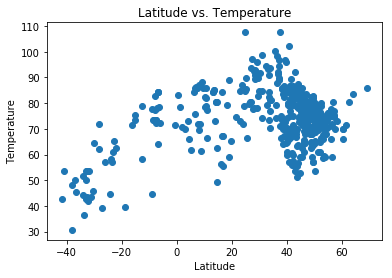

In [13]:
plt.scatter(cities_df['Latitude'],cities_df['Temperature'])
plt.title('Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

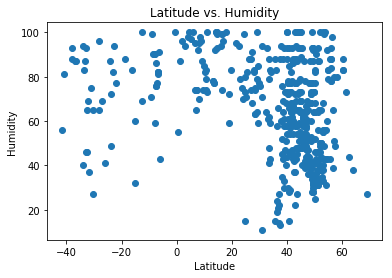

In [22]:
plt.scatter(cities_df['Latitude'],cities_df['Humidity'])
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

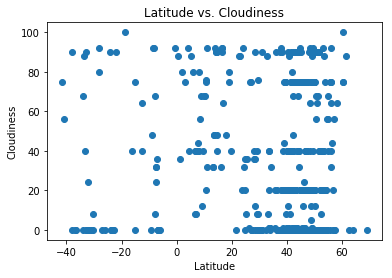

In [23]:
plt.scatter(cities_df['Latitude'],cities_df['Cloudiness'])
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

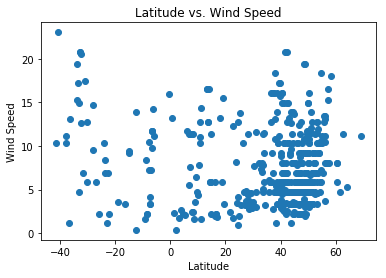

In [24]:
plt.scatter(cities_df['Latitude'],cities_df['Wind Speed'])
plt.title('Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()